In [1]:
%env KERAS_BACKEND = tensorflow

env: KERAS_BACKEND=tensorflow


In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# keras.functions
from keras.models import Sequential, Model
from keras.layers import Input
from keras.layers import Dense, Activation, Lambda, concatenate
from tensorflow.keras.optimizers import SGD  #notice! use tensorflow.keras.optimizers

# keras.dataset
from keras.datasets import mnist  # 手寫辨識資料  mnist

# keras.utilis function
from keras.utils import np_utils    # one-Hot encoding 0 ~ 9 改成向量的 utils

from keras import backend as K

In [4]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

In [5]:
x_train = x_train.reshape(60000, 784)  # 矩陣拉平
x_test = x_test.reshape(10000, 784)

x_train = x_train/255
x_test = x_test/255

In [6]:
enc_1 = Dense(100, activation = 'sigmoid')
enc_2 = Dense(2, activation = 'sigmoid')
dec_2 = Dense(100, activation = 'sigmoid')
dec_1 = Dense(784, activation = 'sigmoid')

In [7]:
x = Input(shape = (784,))

In [8]:
enc_x = enc_1(x)
h = enc_2(enc_x)

dec_x = dec_2(h)
x_reconstructed = dec_1(dec_x)

In [9]:
autoencoder = Model(x, x_reconstructed)
autoencoder.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
_________________________________________________________________
dense_2 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_3 (Dense)              (None, 784)               79184     
Total params: 158,186
Trainable params: 158,186
Non-trainable params: 0
_________________________________________________________________


In [10]:
autoencoder.compile(loss = 'kullback_leibler_divergence', optimizer = 'Nadam')

In [11]:
autoencoder.fit(x_train, x_train, batch_size = 100, epochs = 5)

Epoch 1/5
600/600 [==============================] - 6s 8ms/step - loss: -17.4946
Epoch 2/5
600/600 [==============================] - 4s 7ms/step - loss: -21.9361
Epoch 3/5
600/600 [==============================] - 5s 8ms/step - loss: -22.0091
Epoch 4/5
600/600 [==============================] - 6s 9ms/step - loss: -22.0296
Epoch 5/5
600/600 [==============================] - 6s 9ms/step - loss: -22.0382


In [12]:
# 也可以用助教給的權重 autoencoder.load_weights('autoencoder_handwriting_model_weights.h5')

### 視覺化 - 子模型的取出

In [13]:
Encoder = Model(x, h)
Encoder.summary()

Model: "model_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 784)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               78500     
_________________________________________________________________
dense_1 (Dense)              (None, 2)                 202       
Total params: 78,702
Trainable params: 78,702
Non-trainable params: 0
_________________________________________________________________


In [14]:
h_input = Input(shape = (2,))
Decoder = Model(h_input, dec_1(dec_2(h_input)))
Decoder.summary()

Model: "model_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_2 (InputLayer)         [(None, 2)]               0         
_________________________________________________________________
dense_2 (Dense)              (None, 100)               300       
_________________________________________________________________
dense_3 (Dense)              (None, 784)               79184     
Total params: 79,484
Trainable params: 79,484
Non-trainable params: 0
_________________________________________________________________


### 視覺化 - Encoder

In [15]:
idx = np.random.randint(x_train.shape[0])
print('第 %d 圖的 latent 表示%s' %(idx, Encoder.predict(x_train[idx: idx+1])))

第 16219 圖的 latent 表示[[0.9998975 0.9999297]]


In [16]:
idices = np.random.randint(x_test.shape[0], size = 1000)

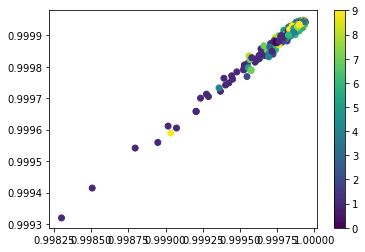

In [17]:
latents = Encoder.predict(x_test[idices])
plt.scatter(latents[:, 0], latents[:, 1], c = y_test[idices])
plt.colorbar()
plt.show()

### 視覺化 - Decoder

In [18]:
n = 15
digit_size = 28
figure = np.zeros((digit_size*n, digit_size*n))
grid_x = np.linspace(0.05, 0.95, n)
grid_y = np.linspace(0.05, 0.95, n)

In [20]:
for i, yi in enumerate(grid_x):
    for j, xi in enumerate(grid_y):
        z_sample = np.array([[xi, yi]])
        x_decoded = Decoder.predict(z_sample)
        digit = x_decoded[0].reshape(digit_size, digit_size)
        figure[(n-i-1)*digit_size:(n-i)*digit_size, j*digit_size:(j+1)*digit_size] = digit

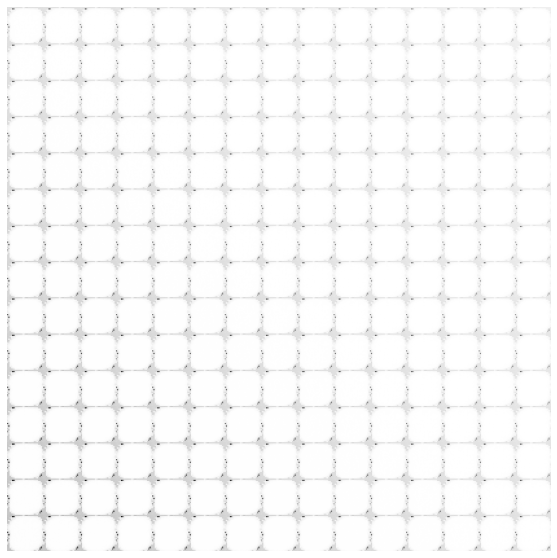

In [21]:
plt.figure(figsize = (10, 10))
plt.imshow(figure, cmap = 'Greys_r')
plt.axis('off')
plt.show()